In [2]:
#import the data set using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data= pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
x= data.iloc[:,[3,4]].values

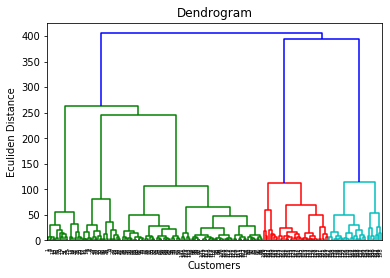

In [12]:
#import the clusters to check the Hierarchy values
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eculiden Distance")
plt.show()

In [16]:
#create the model
from sklearn.cluster import AgglomerativeClustering
clusmodel= AgglomerativeClustering(n_clusters=5)
label= clusmodel.fit_predict(x)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [17]:
supervised= pd.DataFrame(data)

In [18]:
supervised["Cluster Group"]= label

In [19]:
supervised.to_csv("Cluster_Hierarchy.csv",index=False)

In [22]:
centroids= clusmodel.n_leaves_

In [21]:
centroids

1

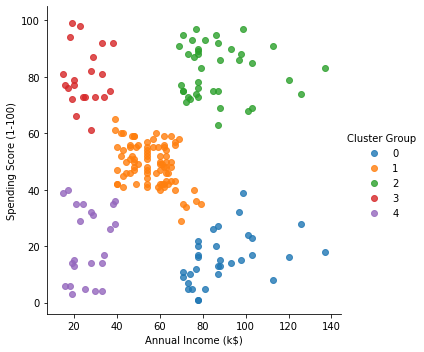

In [29]:
import seaborn as sns
fact= sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)